In [33]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2lab, lab2rgb
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.pyplot as plt

In [34]:
# size of image on which model was trained
# me need to resize all the images to this size


IMAGE_DIMENSION = (128, 128)

Loading trained autoencoder model

In [35]:
autoencoder = load_model('../input/satelite-coloor-img/model/colorizer')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
encoder (Functional)         (None, 65536)             369664    
_________________________________________________________________
decoder (Functional)         (None, 128, 128, 2)       960066    
Total params: 1,329,730
Trainable params: 1,329,730
Non-trainable params: 0
_________________________________________________________________


Testing on images

In [36]:
test_image_dir = '../input/satelite-coloor-img/test_images'
testing_files = os.listdir(test_image_dir)
print('FOUND {} IMAGES'.format(len(testing_files)))

FOUND 10 IMAGES


In [37]:
CHOSEN_IMAGE_INDEX = 4
print('Testing on ', testing_files[CHOSEN_IMAGE_INDEX])
image_file_name = testing_files[CHOSEN_IMAGE_INDEX]

Testing on  sample1.jpg


Reading image

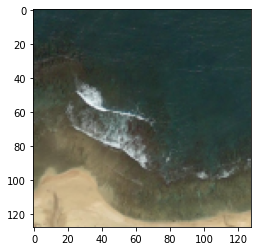

In [38]:
# reading image
img = imread('../input/satelite-coloor-img/test_images/'+image_file_name)
# some images have 4 channels for transparency (like png images), discarding 4th channel
img = img[:,:,:3]
# resizing image to required dimension
img = resize(img, IMAGE_DIMENSION)

# plotting image
plt.imshow(img)

RGB to LAB

In [39]:
def LAB2RGB(l, ab, dim):
    im = np.empty(dim + (3,))
    im[:,:,0] = l.reshape(dim)
    im[:,:,1:] = ab * 128
    return lab2rgb(im)

def RGB2LAB(rgb, dim):
    rgb = rgb.reshape(dim+(3,))
    # /255 not required as resize returns in [0,1] range
    # rgb = rgb / 255
    lab = rgb2lab(rgb)
    l = np.empty(dim+(1,))
    ab = np.empty(dim+(2,))
    l = np.expand_dims(lab[:,:,0], axis=2)
    ab = lab[:,:,1:] / 128
    return l, ab

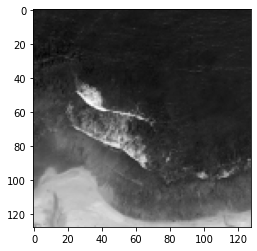

In [40]:
# converting to lab color 
l, ab = RGB2LAB(img, IMAGE_DIMENSION)


# plotting l channel (black and white)
plt.imshow(l.reshape(IMAGE_DIMENSION), cmap='gray')

In [41]:
# predicting color of black and white image

predicted_ab = autoencoder.predict(np.expand_dims(l, axis=0))

# converting LA'B' to RGB

colorized_image = LAB2RGB(l, predicted_ab[0], IMAGE_DIMENSION)
print("FInal color image shape ",colorized_image.shape)

FInal color image shape  (128, 128, 3)


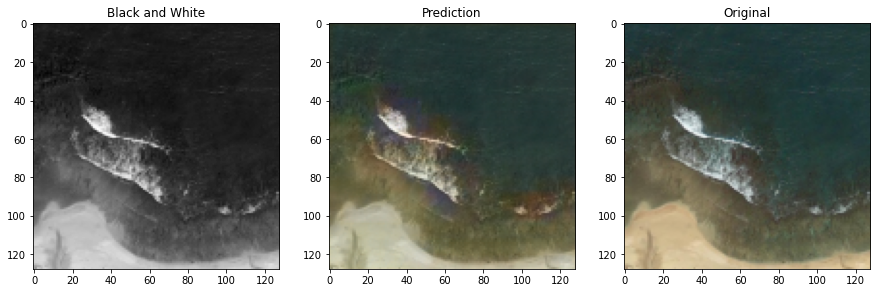

In [42]:
# plotting all images

plt.figure(figsize=(15,18))
plt.subplot(1,3,1)
plt.imshow(l.reshape(IMAGE_DIMENSION), cmap='gray')
plt.title('Black and White')

plt.subplot(1,3,2)
plt.imshow(colorized_image)
plt.title('Prediction')

plt.subplot(1,3,3)
plt.imshow(img)
plt.title('Original')

plt.show()